In [5]:
import pygame
from Button_module import Button
import tkinter as tk
from tkinter import filedialog
import os
import time
import pygame

pygame.init()

SCREEN = pygame.display.set_mode((1280, 720))
pygame.display.set_caption("Menu")
selected_image_path = None
selected_artist = None

BG1 = pygame.image.load("background.png")
BG2 = pygame.image.load("background2.png")


def select_image():
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(initialdir=os.getcwd(), title="Select Image File",
                                           filetypes=(("Image files", "*.jpg;*.jpeg;*.png;*.gif"), ("All files", "*.*")))
    root.destroy()
    return file_path

def get_font(size):
    return pygame.font.Font("font.ttf", size)

def display_artist_image(artist_path):
    image = pygame.image.load(artist_path).convert_alpha()
    original_size = image.get_size()
    scaled_size = (int(original_size[0] * 0.45), int(original_size[1] * 0.45))  # Adjust the scaling factor as needed
    scaled_image = pygame.transform.scale(image, scaled_size)
    return scaled_image

def play():
    global selected_image_path, selected_artist
    show_image = False
    show_style_selection = False
    current_bg = BG2

    BROWSE_BUTTON = None
    NEXT_BUTTON = None

    buffer = pygame.Surface((1280, 720))
    apply_button = None
    text_input = None

    # Artist buttons
    PICASSO_BUTTON = Button(image=pygame.image.load(
        "button2.png"), pos=(320, 600),
        text_input="Picasso", font=get_font(30), base_color="White", hovering_color="Green")

    VAN_GOGH_BUTTON = Button(image=pygame.image.load(
        "button2.png"), pos=(640, 600),
        text_input="Van Gogh", font=get_font(30), base_color="White", hovering_color="Green")

    MUNCH_BUTTON = Button(image=pygame.image.load(
        "button2.png"), pos=(950, 600),
        text_input="Munch", font=get_font(30), base_color="White", hovering_color="Green")

    processing_screen_message = get_font(20).render("", True, "White")  # Initialize with an empty message
    estimated_time_message = get_font(20).render("", True, "White")  # Initialize with an empty message
    show_processing_screen = False
    apply_button_clicked = False  # Track if the apply button is clicked
    apply_button = Button(image=None, pos=(1000, 350),
                          text_input="Apply", font=get_font(30), base_color="White",
                          hovering_color="Orange")

    while True:

        PLAY_MOUSE_POS = pygame.mouse.get_pos()
        buffer.blit(pygame.transform.scale(current_bg, (1280, 720)), (0, 0))

        if show_image and selected_image_path and not apply_button_clicked:
            try:
                image = pygame.image.load(selected_image_path).convert_alpha()
                original_size = image.get_size()
                scaled_size = (int(original_size[0] * 0.4), int(original_size[1] * 0.4))
                scaled_image = pygame.transform.scale(image, scaled_size)
                image_rect = scaled_image.get_rect(center=(640, 360))
                buffer.blit(scaled_image, image_rect)

                if selected_artist:
                    artist_image = display_artist_image(selected_artist)
                    artist_rect = artist_image.get_rect(center=(640, 360))
                    buffer.blit(artist_image, artist_rect)

                STYLE_HEADER = get_font(40).render("Pick a Style!", True, "White")
                STYLE_RECT = STYLE_HEADER.get_rect(center=(640, 120))
                buffer.blit(STYLE_HEADER, STYLE_RECT)

                # Display artist buttons
                if PICASSO_BUTTON:
                    PICASSO_BUTTON.changeColor(PLAY_MOUSE_POS)
                    PICASSO_BUTTON.update(buffer)
                    if PICASSO_BUTTON.checkForInput(PLAY_MOUSE_POS) and pygame.mouse.get_pressed()[0]:  # Check if left mouse button is pressed
                        selected_artist = "Picasso.jpg"
                        text_input = "Picasso"

                if VAN_GOGH_BUTTON:
                    VAN_GOGH_BUTTON.changeColor(PLAY_MOUSE_POS)
                    VAN_GOGH_BUTTON.update(buffer)
                    if VAN_GOGH_BUTTON.checkForInput(PLAY_MOUSE_POS) and pygame.mouse.get_pressed()[0]:  # Check if left mouse button is pressed
                        selected_artist = "Van Gogh.jpg"
                        text_input = "Van Gogh"

                if MUNCH_BUTTON:
                    MUNCH_BUTTON.changeColor(PLAY_MOUSE_POS)
                    MUNCH_BUTTON.update(buffer)
                    if MUNCH_BUTTON.checkForInput(PLAY_MOUSE_POS) and pygame.mouse.get_pressed()[0]:  # Check if left mouse button is pressed
                        selected_artist = "Munch.jpg"
                        text_input = "Munch"

                # Display Apply button
                if selected_artist is not None and not apply_button_clicked:
                    apply_button.changeColor(PLAY_MOUSE_POS)
                    apply_button.update(buffer)

                    # Check if Apply button is clicked
                    for event in pygame.event.get():
                        if event.type == pygame.MOUSEBUTTONUP and event.button == 1:  # Check for left mouse button release
                            start_time = time.time()
                            if apply_button.checkForInput(PLAY_MOUSE_POS):
                                apply_button_clicked = True
                                show_processing_screen = True
                                # Hide Apply button
                                apply_button = None
                                # Hide all other components except the Apply button
                                BROWSE_BUTTON = None
                                NEXT_BUTTON = None
                                processing_start_time = None  # Reset processing start time
                                processing_screen_message = get_font(20).render(
                                    f"Hold on! Your image is being painted by AI {text_input}", True, "Yellow")
                                estimated_time_message = get_font(20).render(
                                    "Estimated waiting time: > 10 minutes", True, "White")
                                note_message = get_font(20).render(
                                    "Note: You will be directed to the main menu...", True, "Green")
                                Exit_screen_message = get_font(15).render(
                                    f"Press \"Quit\" to process the image", True, "Green")
                                Exit2_screen_message = get_font(15).render(
                                    f"Press \"Play\" to pick another image ", True, "Green")
                                print("Selected Artist Path:", selected_artist)

            except pygame.error:
                print("Error loading image:", selected_image_path)

        if show_processing_screen:
            current_time = time.time()
            elapsed_time = current_time - start_time
            buffer.blit(processing_screen_message, (150, 260))
            buffer.blit(estimated_time_message, (150, 300))
            buffer.blit(note_message, (150, 420))
            buffer.blit(Exit_screen_message, (150, 480))
            buffer.blit(Exit2_screen_message, (150, 520))

            if not processing_start_time:
                processing_start_time = time.time()  # Record the start time when entering the processing screen
                countdown_duration = 10  # Set the countdown duration in seconds
                start_countdown_time = (processing_start_time + 1) + countdown_duration  # Calculate the end time for the countdown

            remaining_time = int(start_countdown_time - current_time)
            countdown_message = get_font(20).render(f"Program temporory closing in: {max(0, remaining_time)} seconds", True, "White")
            buffer.blit(countdown_message, (150, 340))

            if elapsed_time >= countdown_duration:  # Display the estimated time for the countdown duration
                show_processing_screen = False  # Stop showing the processing screen
                break  # Exit the loop

        if not show_style_selection:
            PLAY_TEXT = get_font(45).render("Drop image \u2193", True, "White")
            PLAY_RECT = PLAY_TEXT.get_rect(center=(640, 260))
            buffer.blit(PLAY_TEXT, PLAY_RECT)

        if not show_image:
            BROWSE_BUTTON = Button(image=None, pos=(640, 360),
                                   text_input="Browse Image", font=get_font(40), base_color="White",
                                   hovering_color="Green")

            BROWSE_BUTTON.changeColor(PLAY_MOUSE_POS)
            BROWSE_BUTTON.update(buffer)

        if selected_image_path and not show_image and not show_style_selection:
            NEXT_BUTTON = Button(image=None, pos=(640, 420),
                                 text_input="Next", font=get_font(40), base_color="White", hovering_color="Green")

            NEXT_BUTTON.changeColor(PLAY_MOUSE_POS)
            NEXT_BUTTON.update(buffer)

            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
                if event.type == pygame.MOUSEBUTTONDOWN:
                    if NEXT_BUTTON.checkForInput(PLAY_MOUSE_POS):
                        current_bg = BG2
                        show_image = True
                        show_style_selection = True
                        if BROWSE_BUTTON:
                            BROWSE_BUTTON = None
                        if NEXT_BUTTON:
                            NEXT_BUTTON = None

        if not show_image:
            PLAY_BACK = Button(image=None, pos=(640, 480),
                               text_input="BACK", font=get_font(40), base_color="White", hovering_color="Green")

            PLAY_BACK.changeColor(PLAY_MOUSE_POS)
            PLAY_BACK.update(buffer)

        SCREEN.blit(buffer, (0, 0))
        pygame.display.flip()

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

            if event.type == pygame.MOUSEBUTTONDOWN:
                if BROWSE_BUTTON and BROWSE_BUTTON.checkForInput(PLAY_MOUSE_POS):
                    selected_image_path = select_image()
                    print("Selected Image Path:", selected_image_path)
                    show_image = False  # Hide the imported image when selecting a new one
                    apply_button_clicked = False  # Reset the apply button state
                elif NEXT_BUTTON and NEXT_BUTTON.checkForInput(PLAY_MOUSE_POS):
                    show_image = True
                    show_style_selection = True
                    if BROWSE_BUTTON:
                        BROWSE_BUTTON = None
                    if NEXT_BUTTON:
                        NEXT_BUTTON = None
                elif apply_button and apply_button.checkForInput(PLAY_MOUSE_POS):
                    print("Selected Artist Path:", selected_artist)
                    # Perform the apply button action here
                    apply_button_clicked = True

                elif PLAY_BACK and PLAY_BACK.checkForInput(PLAY_MOUSE_POS):
                    return


def main_menu():
    while True:
        MENU_MOUSE_POS = pygame.mouse.get_pos()

        SCREEN.blit(pygame.transform.scale(BG1, (1280, 720)), (0, 0))

        PLAY_BUTTON = Button(image=pygame.image.load(
           "button.png"),
            pos=(640, 330), text_input="START", font=get_font(60), base_color="#d7fcd4", hovering_color="White")

        QUIT_BUTTON = Button(image=pygame.image.load(
            "button.png"),
            pos=(640, 460), text_input="QUIT", font=get_font(60), base_color="#d7fcd4", hovering_color="White")

        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()
                return

            if event.type == pygame.MOUSEBUTTONDOWN:
                if PLAY_BUTTON.checkForInput(MENU_MOUSE_POS):
                    play()
                elif QUIT_BUTTON.checkForInput(MENU_MOUSE_POS):
                    pygame.quit()
                    return

        for button in [PLAY_BUTTON, QUIT_BUTTON]:
            button.changeColor(MENU_MOUSE_POS)
            button.update(SCREEN)

        pygame.display.flip()

main_menu()


Selected Image Path: D:/Degree projects/Python and Tensorflow programming/G14_FinalProject/PaintHub/Inputpenguin.jpeg.jpg
Selected Artist Path: Van Gogh.jpg


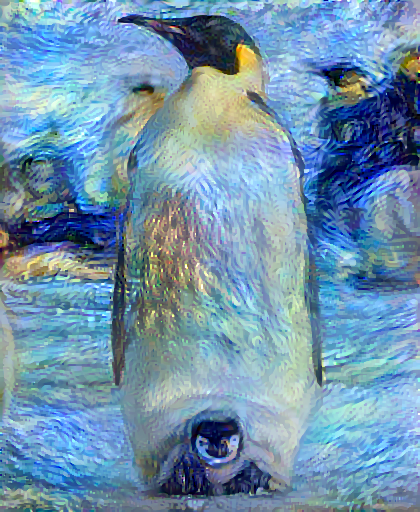

Train step: 1000
Total time: 869.0


In [6]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

import IPython.display as display
import numpy as np
import PIL.Image
import time

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

content_path = selected_image_path
style_path = selected_artist

def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

content_image = load_img(content_path)
style_image = load_img(style_path)

import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

def vgg_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']
image = tf.Variable(content_image)
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
style_weight=1e-2
content_weight=1e4
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

x_deltas, y_deltas = high_pass_x_y(content_image)

x_deltas, y_deltas = high_pass_x_y(image)

sobel = tf.image.sobel_edges(content_image)

def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

total_variation_loss(image).numpy()

tf.image.total_variation(image).numpy()

total_variation_weight=30
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
image = tf.Variable(content_image)

import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))


In [7]:
final_image = tensor_to_image(image)
final_image.save("final_output.png")

In [8]:
import pygame
from Button_module import Button
import os
import subprocess  # Used for opening the file explorer

pygame.init()

SCREEN = pygame.display.set_mode((1280, 720))
pygame.display.set_caption("Final Image Display")

def get_font(size):
    return pygame.font.Font("font.ttf", size)

BG = pygame.image.load("background2.png")

def display_final_image(final_image_path):
    try:
        final_image = pygame.image.load(final_image_path).convert_alpha()
        original_size = final_image.get_size()
        scaled_size = (int(original_size[0]), int(original_size[1]))
        scaled_image = pygame.transform.scale(final_image, scaled_size)
        image_rect = scaled_image.get_rect(center=(640, 360))
        SCREEN.blit(scaled_image, image_rect)
    except pygame.error:
        print("Error loading image:", final_image_path)

def main():
    final_image_path = "final_output.png"  # Update with your actual final image path

    exit_button = Button(image=None, pos=(640, 660),
                         text_input="Exit", font=get_font(30), base_color="White", hovering_color="Green")

    open_folder_button = Button(image=pygame.image.load(
        "button2.png"), pos=(1050, 300),
        text_input="Download", font=get_font(30), base_color="White", hovering_color="Green")

    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
            elif event.type == pygame.MOUSEBUTTONDOWN:
                if exit_button.checkForInput(pygame.mouse.get_pos()):
                    running = False
                elif open_folder_button.checkForInput(pygame.mouse.get_pos()):
                    # Open the folder containing the final image
                    folder_path = os.path.dirname(os.path.abspath(final_image_path))
                    subprocess.Popen(f'explorer "{folder_path}"')  # Open file explorer in Windows

        SCREEN.blit(pygame.transform.scale(BG, (1280, 720)), (0, 0))
        display_final_image(final_image_path)  # Display the final image on top of the background

        # Draw the caption after displaying the final image
        final_screen_message = get_font(30).render("Your image is ready!", True, (255, 255, 255))
        text_rect = final_screen_message.get_rect(center=(640, 50))
        SCREEN.blit(final_screen_message, text_rect)

        # Update and draw the exit button
        exit_button.changeColor(pygame.mouse.get_pos())
        exit_button.update(SCREEN)

        # Update and draw the open folder button
        open_folder_button.changeColor(pygame.mouse.get_pos())
        open_folder_button.update(SCREEN)

        pygame.display.flip()

    pygame.quit()

if __name__ == "__main__":
    main()
